<a href="https://colab.research.google.com/github/brunooziel/airbnb-analytics/blob/main/airbnb_massachusetts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - *Massachusetts***

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Massachusetts, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Obtenção dos Dados**

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in  Massachusetts (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ma/boston/2022-03-20/visualisations/listings.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3462 non-null   int64  
 1   name                            3462 non-null   object 
 2   host_id                         3462 non-null   int64  
 3   host_name                       3462 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3462 non-null   object 
 6   latitude                        3462 non-null   float64
 7   longitude                       3462 non-null   float64
 8   room_type                       3462 non-null   object 
 9   price                           3462 non-null   int64  
 10  minimum_nights                  3462 non-null   int64  
 11  number_of_reviews               3462 non-null   int64  
 12  last_review                     25

## **Análise dos Dados**

A etapa de análise nos ajuda a entender como os dados estão estruturados e vislumbrar insights para novos projetos. Neste notebook, vamos realizar análises mais geral e ver o que podemos concluir com isso.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de avaliações que recebeu
* `license` - especificação da licença

Antes de iniciar qualquer análise, vamos visalizar nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,132,32,22,2022-01-30,0.27,1,48,3,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,110,2021-10-25,0.70,10,12,3,Approved by the government
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,250,3,116,2021-10-12,0.75,10,105,1,STR446650
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,110,91,25,2020-04-15,0.27,7,267,0,NaN
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35906,-71.06271,Entire home/apt,100,91,33,2021-12-16,0.22,7,223,1,NaN


### **Quantidade de variáveis e entradas dos nossos dados**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 3462
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

A maioria das nossas variáveis são do tipo númericos. 

## **Verificando ausência de dados** 
Vamos visualizar a porcentagem de valores ausentes no dataset.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) *100

neighbourhood_group               100.000000
license                            44.049682
reviews_per_month                  26.891970
last_review                        26.891970
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

* A variável `neighbourhood_group` possuem 100% de valores ausentes - *vamos excluir esta coluna.*
* A variável `license` possue quase a metade de valores ausentes - *podemos preencher as entradas ausentes com a descrição 'No license'.*
* As variáveis `reviews_per_month` e `last_review`possuem 1/4 de valores ausentes - *por se tratar de um quantidade considerável vamos preencher com zeros*

In [ ]:
# removendo coluna sem valores
df.drop(columns='neighbourhood_group', inplace=True)

# preenchendo valores ausentes 
df.license.fillna('No license', inplace= True)
df.reviews_per_month.fillna(0, inplace= True)
df.last_review.fillna(0, inplace= True)

## **O tipo de distribuição das variáveis** 

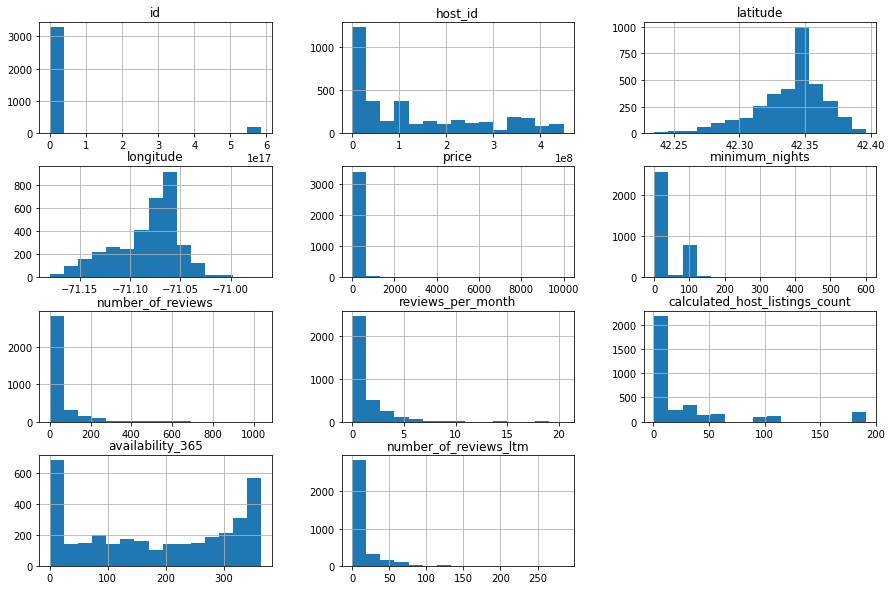

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Pela distribuição do historigrama, é possivel verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe(percentiles=[0.01, 0.15, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000
mean,197.001155,34.228481,40.872039,1.157071,27.742923,184.853553
std,280.043080,41.573919,79.716509,1.789338,47.274944,132.986039
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1%,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000
15%,65.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,90.000000,2.000000,0.000000,0.000000,1.000000,56.000000
50%,150.000000,29.000000,7.000000,0.370000,6.000000,189.500000
75%,238.000000,60.000000,43.000000,1.700000,32.000000,319.000000
90%,350.000000,91.000000,127.000000,3.316000,93.000000,360.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 95% do valor abaixo de 450, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
*  A variável número de avaliações (`number_of_reviews`) possui 99% do valor abaixo de 379, porém seu valor máximo é 1038.

### **Boxplot para minimum_nights**


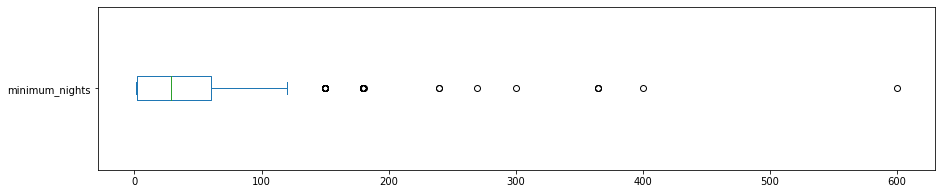

minimum_nights: valores acima de 91:
81 entradas
2.3397%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 91 dias para minimum_nights
print("minimum_nights: valores acima de 91:")
print("{} entradas".format(len(df[df.minimum_nights > 91])))
print("{:.4f}%".format((len(df[df.minimum_nights > 91]) / df.shape[0])*100))

### **Boxplot para price**

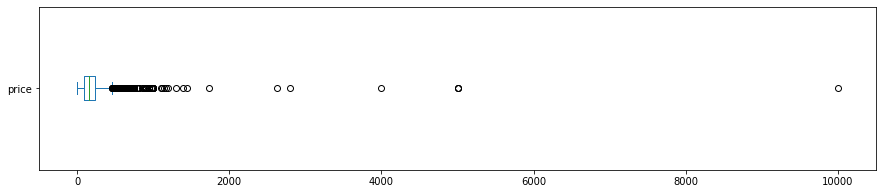


price: valores acima de 450
171 entradas
4.9393%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 450 para price
print("\nprice: valores acima de 450")
print("{} entradas".format(len(df[df.price > 450])))
print("{:.4f}%".format((len(df[df.price > 450]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### **Boxplot para number_of_reviews**

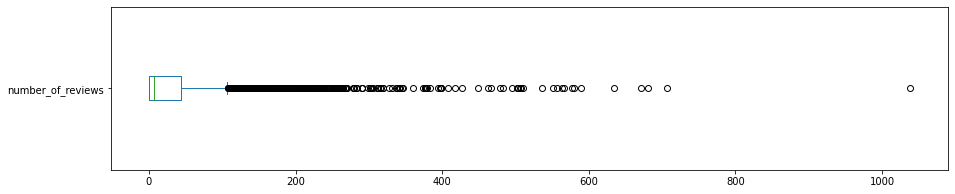


price: valores acima de 250
103 entradas
2.9752%


In [ ]:
# number_of_reviews
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 250 para number_of_reviews
print("\nprice: valores acima de 250")
print("{} entradas".format(len(df[df.number_of_reviews > 250])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 250]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### **Removendo Outliers**

Já que identificamos outliers nas variáveis `price`, `minimum_nights` e `number_of_reviews`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

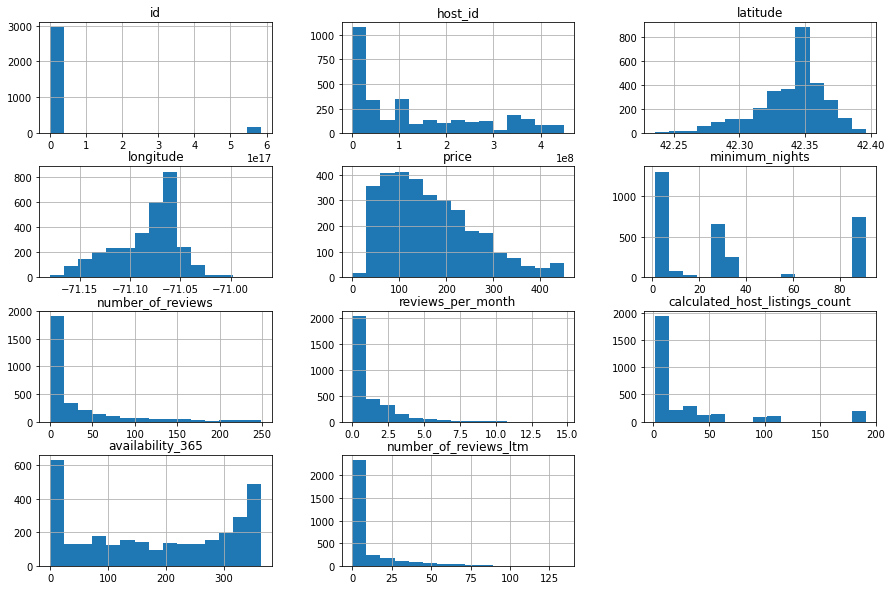

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 450].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 91].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 250].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Correlação entre variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.058833,-0.079328,0.000156,0.229638,0.235085
minimum_nights,-0.058833,1.000000,-0.285306,-0.434682,0.103520,-0.014894
number_of_reviews,-0.079328,-0.285306,1.000000,0.575003,-0.234034,-0.081407
reviews_per_month,0.000156,-0.434682,0.575003,1.000000,-0.224468,-0.089509
calculated_host_listings_count,0.229638,0.103520,-0.234034,-0.224468,1.000000,0.320459
availability_365,0.235085,-0.014894,-0.081407,-0.089509,0.320459,1.000000


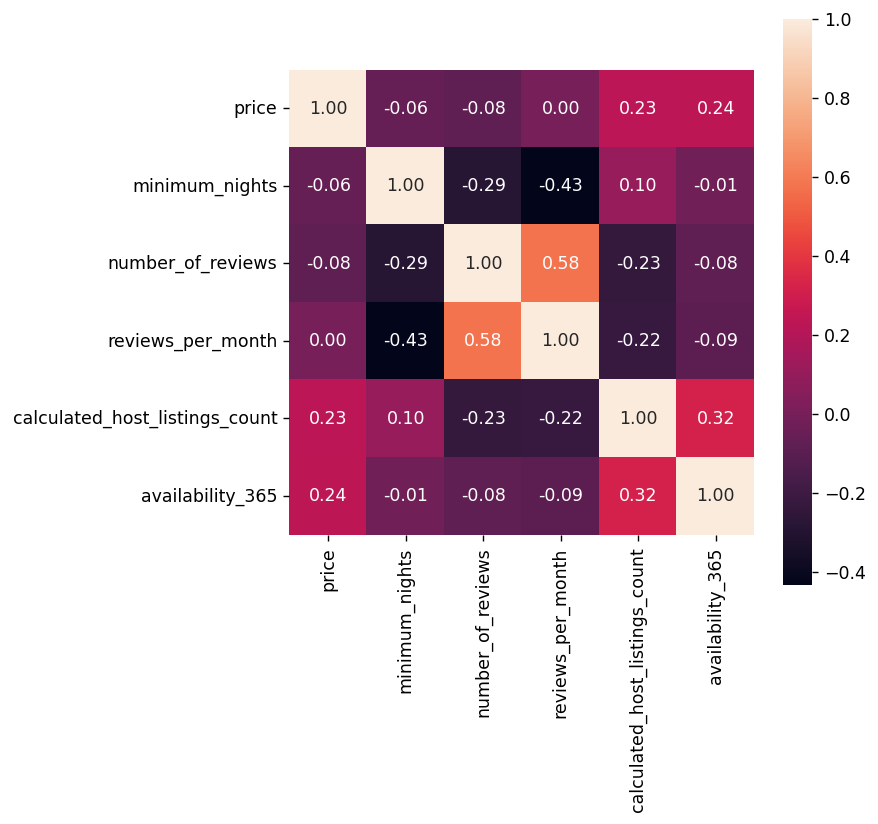

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), dpi = 125)
sns.heatmap(corr, fmt='.2f',  square=True, linecolor='white', annot=True,  ax=ax);

### **Média dos preços de aluguel**

In [ ]:
# ver a média da coluna `price`
print('O preço médio: $',df.price.mean())

O preço médio: $ 197.00115540150202


### **Imóvel mais alugado no Airbnb**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts().to_frame()

,room_type
Entire home/apt,2081
Private room,999
Hotel room,19
Shared room,13


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts(normalize=True)*100).to_frame()

,room_type
Entire home/apt,66.870180
Private room,32.101542
Hotel room,0.610540
Shared room,0.417738


In [ ]:
# agrupar o tipo de imóvel com algumas descrições de preço
df_clean[['room_type', 'price']].groupby(by='room_type').agg(func=['count','min', 'mean', 'max', 'std']).round()

price                       
                count min   mean  max    std
room_type                                   
Entire home/apt  2081  45  203.0  450   86.0
Hotel room         19   0  206.0  428  132.0
Private room      999  25   87.0  439   60.0
Shared room        13  22   62.0  131   32.0

* `Entire home/apt` é o tipo de imóvel mais procurado, com preço médio de \$ 200.
* `Private room` é o segundo mais procurado, com preço médio de \$ 100.
* `Shared room` é o imóvel mais barato e menos procurado. 

### **A localidade mais cara do dataset**

Podemos verificar a localidade mais cara com auxilio do `groupby().` No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].to_frame()

,price
neighbourhood,
Chinatown,266.456522
Back Bay,224.185567
Downtown,218.695035
Leather District,213.000000
South Boston Waterfront,209.162162
Fenway,207.702290
North End,202.095890
West End,196.625000
South End,194.673077


Acima, vemos que bairros como Back Bay e Chinatown  estão com média de preço superior aos demais lugares.

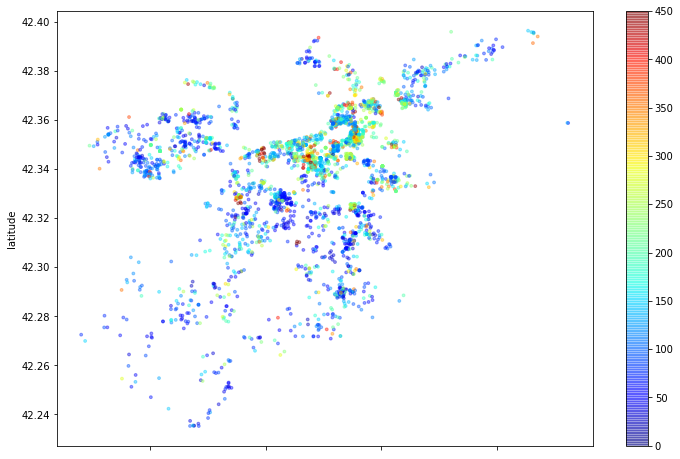

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Média do mínimo de noites para aluguel (minimum_nights)**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

32.44248071979435

## Conclusões



Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

